In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Utilities.visutils as visutils
import Utilities.camutils as camutils
import Utilities.calibration as calibration
import Utilities.decode as decode
import Utilities.meshing as meshing
import Utilities.meshingRGB as rgb
import open3d as o3d

from config import CAM1_CALIB, CAM2_CALIB, CHESSBOARD, CAM1_CALIB_EX, CAM2_CALIB_EX, MASK_PREFIX, COLOR_PREFIX, GRAB0, GRAB1, GRAB2, GRAB3, GRAB4

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# Set up chessboard
chessboardDimensions = CHESSBOARD
cam1Images = calibration.getImages(CAM1_CALIB) # left
cam2Images = calibration.getImages(CAM2_CALIB) # right

Found 20 images
Found 20 images


In [3]:
# Intrinsic camera calibration
cam1K = calibration.intrinsic_Calibration(chessboardDimensions, cam1Images, False)
cam2K = calibration.intrinsic_Calibration(chessboardDimensions, cam2Images, False)
print(f"Cam1 K = {cam1K}")
print(f"Cam2 K = {cam2K}")

Cam1 K = [[1.40342239e+03 0.00000000e+00 9.59837032e+02]
 [0.00000000e+00 1.40116582e+03 5.83454863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Cam2 K = [[1.41025245e+03 0.00000000e+00 9.63549938e+02]
 [0.00000000e+00 1.40794026e+03 5.99720531e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


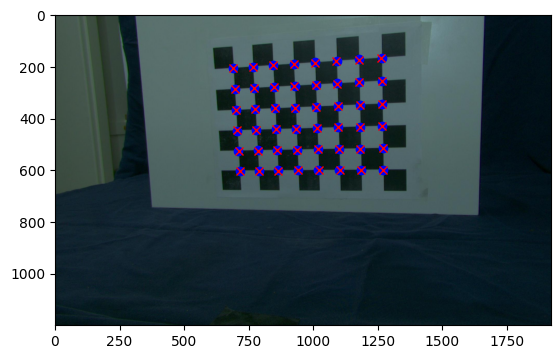

Camera : 
 f=1402.2941082854932 
 c=[[959.83703213 583.45486267]] 
 R=[[ 0.03884436  0.98981169  0.13698147]
 [ 0.97696218 -0.00883092 -0.2132297 ]
 [-0.20984758  0.14210849 -0.96735163]] 
 t = [[ 7.22817482 20.90563403 50.59019818]]


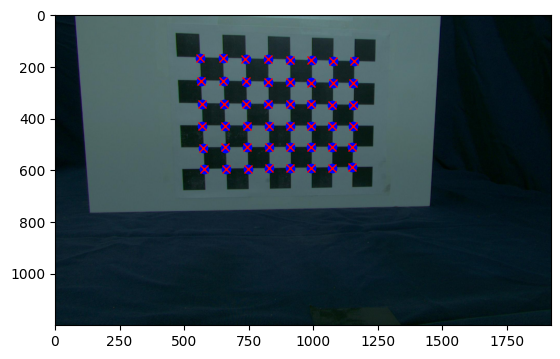

Camera : 
 f=1409.0963508438579 
 c=[[963.54993838 599.72053131]] 
 R=[[-0.00226799  0.99087013  0.13480073]
 [ 0.99277887 -0.01393666  0.11914652]
 [ 0.1199374   0.13409754 -0.98368332]] 
 t = [[ 8.29185692  7.74888118 51.40249373]]


In [4]:
# Extrinsic camera calibration
cam1Image = CAM1_CALIB_EX
cam2Image = CAM2_CALIB_EX

cam1, cam1_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam1Image, cam1K)
cam2, cam2_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam2Image, cam2K)

# Display
# Left
plt.figure()
pts2_1 = cam1.project(pts3)
imgL = plt.imread(cam1Image)
plt.imshow(imgL)
plt.plot(pts2_1[0,:],pts2_1[1,:],'bo')
plt.plot(cam1_pts2[0,:],cam1_pts2[1,:],'rx')
plt.show()
print(cam1)

# Right
plt.figure()
pts2_2 = cam2.project(pts3)
imgR = plt.imread(cam2Image)
plt.imshow(imgR)
plt.plot(pts2_2[0,:],pts2_2[1,:],'bo')
plt.plot(cam2_pts2[0,:],cam2_pts2[1,:],'rx')
plt.show()
print(cam2)


In [5]:
# Thresholds for decoding and reconstruction
gray_threshold = 0.01
color_threshold = 0.006

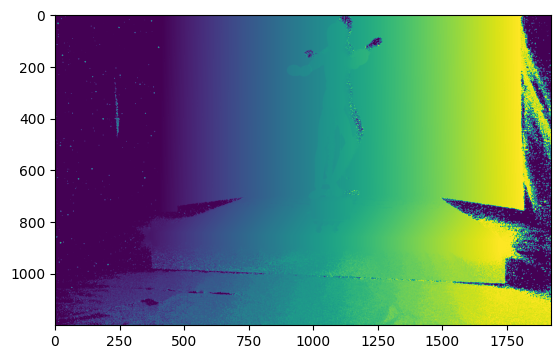

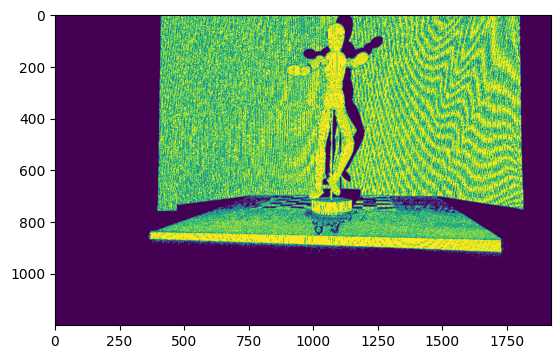

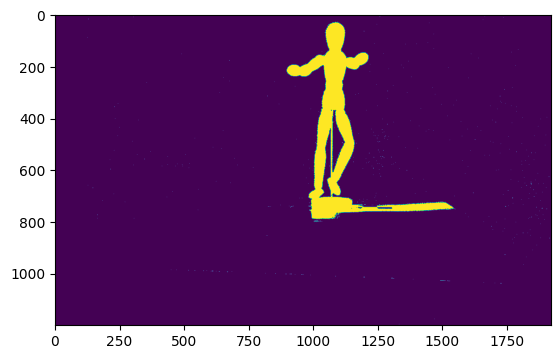

In [6]:
#( .png images)

# Code and gray mask
imagePrefix = MASK_PREFIX
code, mask = decode.decode_gray(imagePrefix, 0, gray_threshold)
plt.figure() 
plt.imshow(code)
plt.figure() 
plt.imshow(mask)

# Color mask 
colorImagePrefix = COLOR_PREFIX
color_mask = decode.decode_color(colorImagePrefix, color_threshold)
plt.figure() 
plt.imshow(color_mask)


In [7]:
# Reconstruction and clean up
gray_threshold = 0.01
color_threshold = 0.006
point_clouds = []
point_colors = []
triangles = []

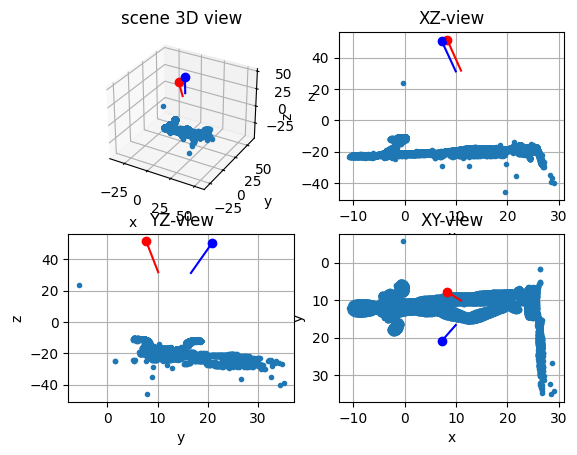

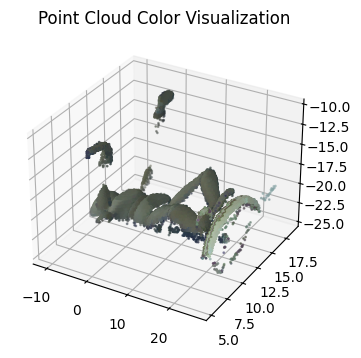

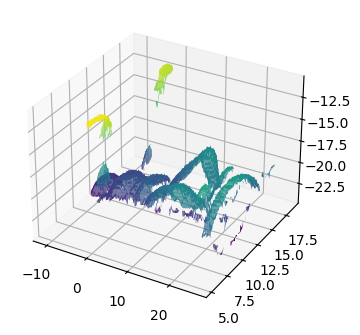

In [8]:
# GRAB 0
pts2L,pts2R,pts3, colorsL, colorsR = decode.reconstruct_with_rgb(GRAB0[0], GRAB0[1], gray_threshold, GRAB0[2], GRAB0[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

# Clean up steps
boxLimits = [-12,26,5,20,-25,5]
pts2L,pts2R,pts3, colorsL, colorsR = rgb.bounding_box_pruning_RGB(pts2L,pts2R,pts3,colorsL, colorsR, boxLimits)
#visutils.visualize_point_cloud_Open3d(pts3, colors = (colorsL + colorsR) / 2)

trithresh = 0.8
pts2L,pts2R,pts3, colorsL, colorsR, valid_triangles = rgb.triangle_pruning_RGB(pts2L.T,pts2R.T,pts3.T, colorsL, colorsR, trithresh)

visutils.visualize_point_cloud(pts3, colors = (colorsL + colorsR) / 2)
visutils.vis_mesh(pts3, valid_triangles)

colors = (colorsL + colorsR) / 2
#visutils.visualize_point_cloud_Open3d(pts3, colors)

# Append for uploading
point_clouds.append(pts3)
point_colors.append(colors.T)
triangles.append(valid_triangles)

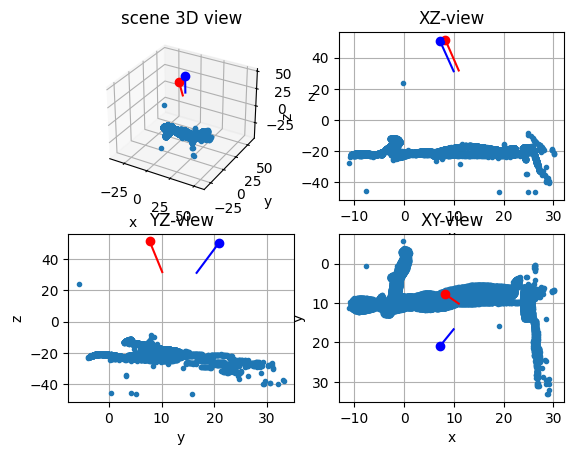

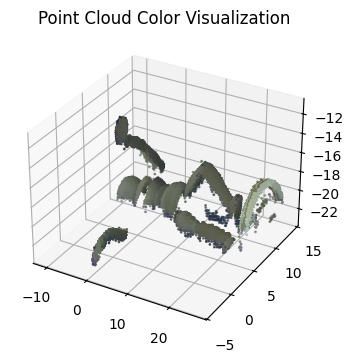

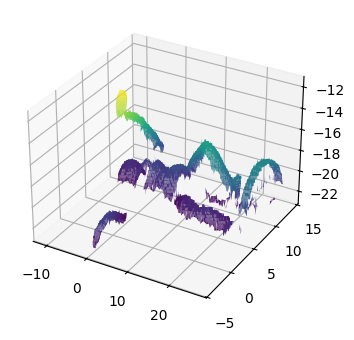

In [9]:
# GRAB 1
pts2L,pts2R,pts3, colorsL, colorsR = decode.reconstruct_with_rgb(GRAB1[0], GRAB1[1], gray_threshold, GRAB1[2], GRAB1[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

# Clean up steps
boxLimits = [-12,26,-5,14,-23,10] # xLo, xHi, yLo, yHi, zLo, zHi
pts2L,pts2R,pts3, colorsL, colorsR = rgb.bounding_box_pruning_RGB(pts2L,pts2R,pts3,colorsL, colorsR, boxLimits)
#visutils.visualize_point_cloud_Open3d(pts3, colors = (colorsL + colorsR) / 2)

trithresh = 0.8
pts2L,pts2R,pts3, colorsL, colorsR, valid_triangles = rgb.triangle_pruning_RGB(pts2L.T,pts2R.T,pts3.T, colorsL, colorsR, trithresh)

visutils.visualize_point_cloud(pts3, colors = (colorsL + colorsR) / 2)
visutils.vis_mesh(pts3, valid_triangles)

colors = (colorsL + colorsR) / 2
#visutils.visualize_point_cloud_Open3d(pts3, colors)

# Append for uploading
point_clouds.append(pts3)
point_colors.append(colors.T)
triangles.append(valid_triangles)

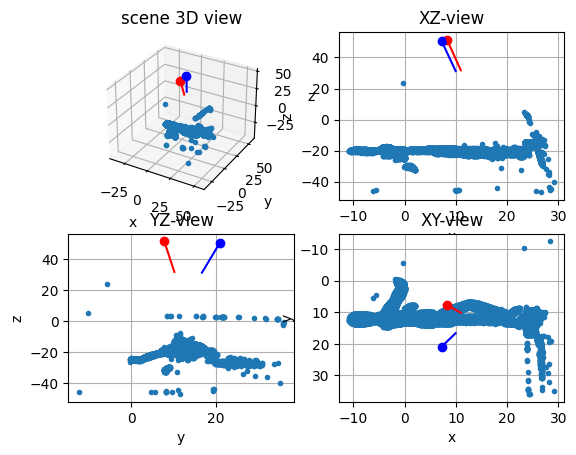

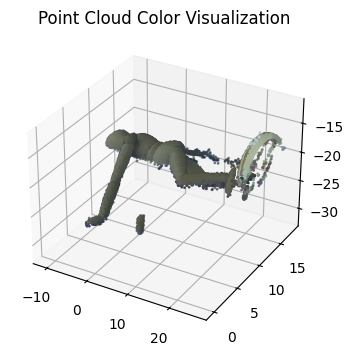

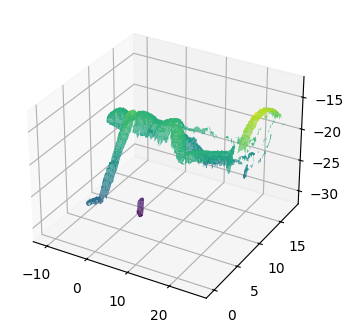

In [10]:
# GRAB 2
pts2L,pts2R,pts3, colorsL, colorsR = decode.reconstruct_with_rgb(GRAB2[0], GRAB2[1], gray_threshold, GRAB2[2], GRAB2[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

# Clean up steps
boxLimits = [-12,26,-1,18,-32,-12] # xLo, xHi, yLo, yHi, zLo, zHi
pts2L,pts2R,pts3, colorsL, colorsR = rgb.bounding_box_pruning_RGB(pts2L,pts2R,pts3,colorsL, colorsR, boxLimits)
#visutils.visualize_point_cloud_Open3d(pts3, colors = (colorsL + colorsR) / 2)

trithresh = 0.8
pts2L,pts2R,pts3, colorsL, colorsR, valid_triangles = rgb.triangle_pruning_RGB(pts2L.T,pts2R.T,pts3.T, colorsL, colorsR, trithresh)

visutils.visualize_point_cloud(pts3, colors = (colorsL + colorsR) / 2)
visutils.vis_mesh(pts3, valid_triangles)

colors = (colorsL + colorsR) / 2
#visutils.visualize_point_cloud_Open3d(pts3, colors)

# Append for uploading
point_clouds.append(pts3)
point_colors.append(colors.T)
triangles.append(valid_triangles)

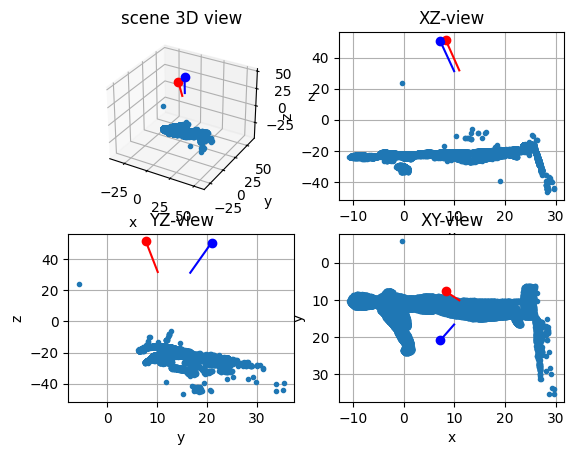

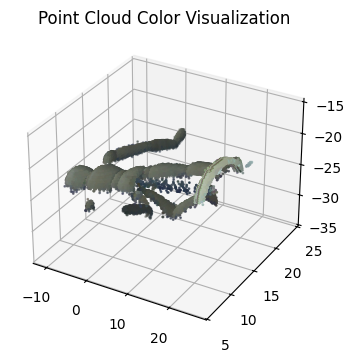

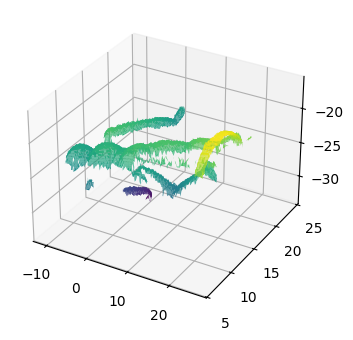

In [11]:
# GRAB 3
pts2L,pts2R,pts3, colorsL, colorsR = decode.reconstruct_with_rgb(GRAB3[0], GRAB3[1], gray_threshold, GRAB3[2], GRAB3[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)


# Clean up steps
boxLimits = [-12,26,6,24,-35,-5] # xLo, xHi, yLo, yHi, zLo, zHi
pts2L,pts2R,pts3, colorsL, colorsR = rgb.bounding_box_pruning_RGB(pts2L,pts2R,pts3,colorsL, colorsR, boxLimits)
#visutils.visualize_point_cloud_Open3d(pts3, colors = (colorsL + colorsR) / 2)

trithresh = 0.8
pts2L,pts2R,pts3, colorsL, colorsR, valid_triangles = rgb.triangle_pruning_RGB(pts2L.T,pts2R.T,pts3.T, colorsL, colorsR, trithresh)

visutils.visualize_point_cloud(pts3, colors = (colorsL + colorsR) / 2)
visutils.vis_mesh(pts3, valid_triangles)

colors = (colorsL + colorsR) / 2
#visutils.visualize_point_cloud_Open3d(pts3, colors)

# Append for uploading
point_clouds.append(pts3)
point_colors.append(colors.T)
triangles.append(valid_triangles)

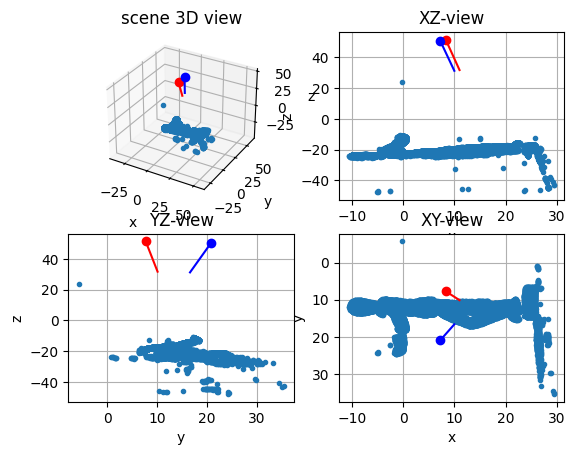

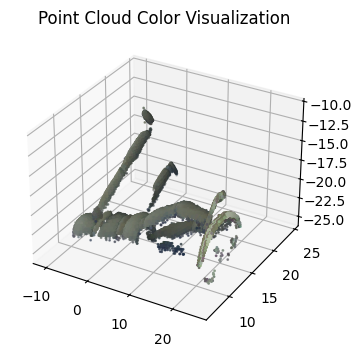

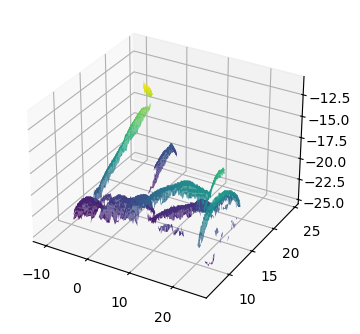

In [12]:
# GRAB 4
pts2L,pts2R,pts3, colorsL, colorsR = decode.reconstruct_with_rgb(GRAB4[0], GRAB4[1], gray_threshold, GRAB4[2], GRAB4[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

# Clean up steps
boxLimits = [-15,25,5,25,-30,-5] # xLo, xHi, yLo, yHi, zLo, zHi
pts2L,pts2R,pts3, colorsL, colorsR = rgb.bounding_box_pruning_RGB(pts2L,pts2R,pts3,colorsL, colorsR, boxLimits)
#visutils.visualize_point_cloud_Open3d(pts3, colors = (colorsL + colorsR) / 2)

trithresh = 0.8
pts2L,pts2R,pts3, colorsL, colorsR, valid_triangles = rgb.triangle_pruning_RGB(pts2L.T,pts2R.T,pts3.T, colorsL, colorsR, trithresh)

visutils.visualize_point_cloud(pts3, colors = (colorsL + colorsR) / 2)
visutils.vis_mesh(pts3, valid_triangles)

colors = (colorsL + colorsR) / 2
#visutils.visualize_point_cloud_Open3d(pts3, colors)

# Append for uploading
point_clouds.append(pts3)
point_colors.append(colors.T)
triangles.append(valid_triangles)

In [13]:
# Check shape of point clound and colors to prepare for exporting
for item in point_clouds:
    print(item.shape)
    
for item in point_colors:
    print(item.shape)
    print(item.dtype)

for item in triangles:
    print(item.shape)

(3, 30021)
(3, 29099)
(3, 29488)
(3, 29776)
(3, 26830)
(3, 30021)
float32
(3, 29099)
float32
(3, 29488)
float32
(3, 29776)
float32
(3, 26830)
float32
(58111, 3)
(56450, 3)
(56794, 3)
(57737, 3)
(52019, 3)


In [16]:
# Save mesh to file
for i in range(0, len(point_clouds)):
    rgb.save_point_cloud_RGB(point_clouds[i], point_colors[i], triangles[i], f"RGBpoint_cloud{(i):01d}.ply")


.PLY saved to: point_clouds_RGB/RGBpoint_cloud0.ply
.PLY saved to: point_clouds_RGB/RGBpoint_cloud1.ply
.PLY saved to: point_clouds_RGB/RGBpoint_cloud2.ply
.PLY saved to: point_clouds_RGB/RGBpoint_cloud3.ply
.PLY saved to: point_clouds_RGB/RGBpoint_cloud4.ply


In [15]:
'''
Enhance with Color Information:
Modify reconstruct to return RGB values for the 3D points.

Generate mesh
Helpful tools:
meshLab
poisson surface reconstruction

Remember to incoorporate color
must maintain color data

Visualize:
Blender
'''

'\nEnhance with Color Information:\nModify reconstruct to return RGB values for the 3D points.\n\nGenerate mesh\nHelpful tools:\nmeshLab\npoisson surface reconstruction\n\nRemember to incoorporate color\nmust maintain color data\n\nVisualize:\nBlender\n'